In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
        

In [3]:
df=pd.read_csv('NFLX.csv')

# READING DATA


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.931429,7.961429,7.565714,7.640000,7.640000,17239600
1,2010-01-05,7.652857,7.657143,7.258571,7.358571,7.358571,23753100
2,2010-01-06,7.361429,7.672857,7.197143,7.617143,7.617143,23290400
3,2010-01-07,7.731429,7.757143,7.462857,7.485714,7.485714,9955400
4,2010-01-08,7.498571,7.742857,7.465714,7.614286,7.614286,8180900


In [6]:
df.shape

(3119, 7)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3119.000000,3119.000000,3119.000000,3119.000000,3119.000000,3.119000e+03
mean,185.774606,188.574990,182.773507,185.747629,185.747629,1.879939e+07
std,182.675775,185.222112,179.874082,182.575796,182.575796,2.091301e+07
min,6.960000,7.178571,6.931429,7.018571,7.018571,1.144000e+06
25%,33.255714,33.815000,32.611429,33.328571,33.328571,6.233250e+06
50%,100.209999,102.110001,98.529999,100.230003,100.230003,1.232560e+07
75%,336.800003,342.384995,331.125000,337.539993,337.539993,2.342225e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.155418e+08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3119 non-null   object 
 1   Open       3119 non-null   float64
 2   High       3119 non-null   float64
 3   Low        3119 non-null   float64
 4   Close      3119 non-null   float64
 5   Adj Close  3119 non-null   float64
 6   Volume     3119 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 170.7+ KB


In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
3114,False,False,False,False,False,False,False
3115,False,False,False,False,False,False,False
3116,False,False,False,False,False,False,False
3117,False,False,False,False,False,False,False


In [13]:
 df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

We see there is no null value in the dataset

In [14]:
df=df[['Date', 'Close','Open']]
df

,Date,Close,Open
0,2010-01-04,7.640000,7.931429
1,2010-01-05,7.358571,7.652857
2,2010-01-06,7.617143,7.361429
3,2010-01-07,7.485714,7.731429
4,2010-01-08,7.614286,7.498571
...,...,...,...
3114,2022-05-17,190.559998,189.169998
3115,2022-05-18,177.190002,186.720001
3116,2022-05-19,183.479996,178.050003
3117,2022-05-20,186.350006,185.869995


In [15]:
# converting object dtype of date column to datetime dtype
df['Date'] = pd.to_datetime(df['Date'])
df['Date']

0      2010-01-04
1      2010-01-05
2      2010-01-06
3      2010-01-07
4      2010-01-08
          ...    
3114   2022-05-17
3115   2022-05-18
3116   2022-05-19
3117   2022-05-20
3118   2022-05-23
Name: Date, Length: 3119, dtype: datetime64[ns]

In [16]:
df.set_index('Date',drop=True,inplace=True)

In [17]:
df.head()

,Close,Open
Date,,
2010-01-04,7.640000,7.931429
2010-01-05,7.358571,7.652857
2010-01-06,7.617143,7.361429
2010-01-07,7.485714,7.731429
2010-01-08,7.614286,7.498571


In [18]:
df.dtypes

Close    float64
Open     float64
dtype: object

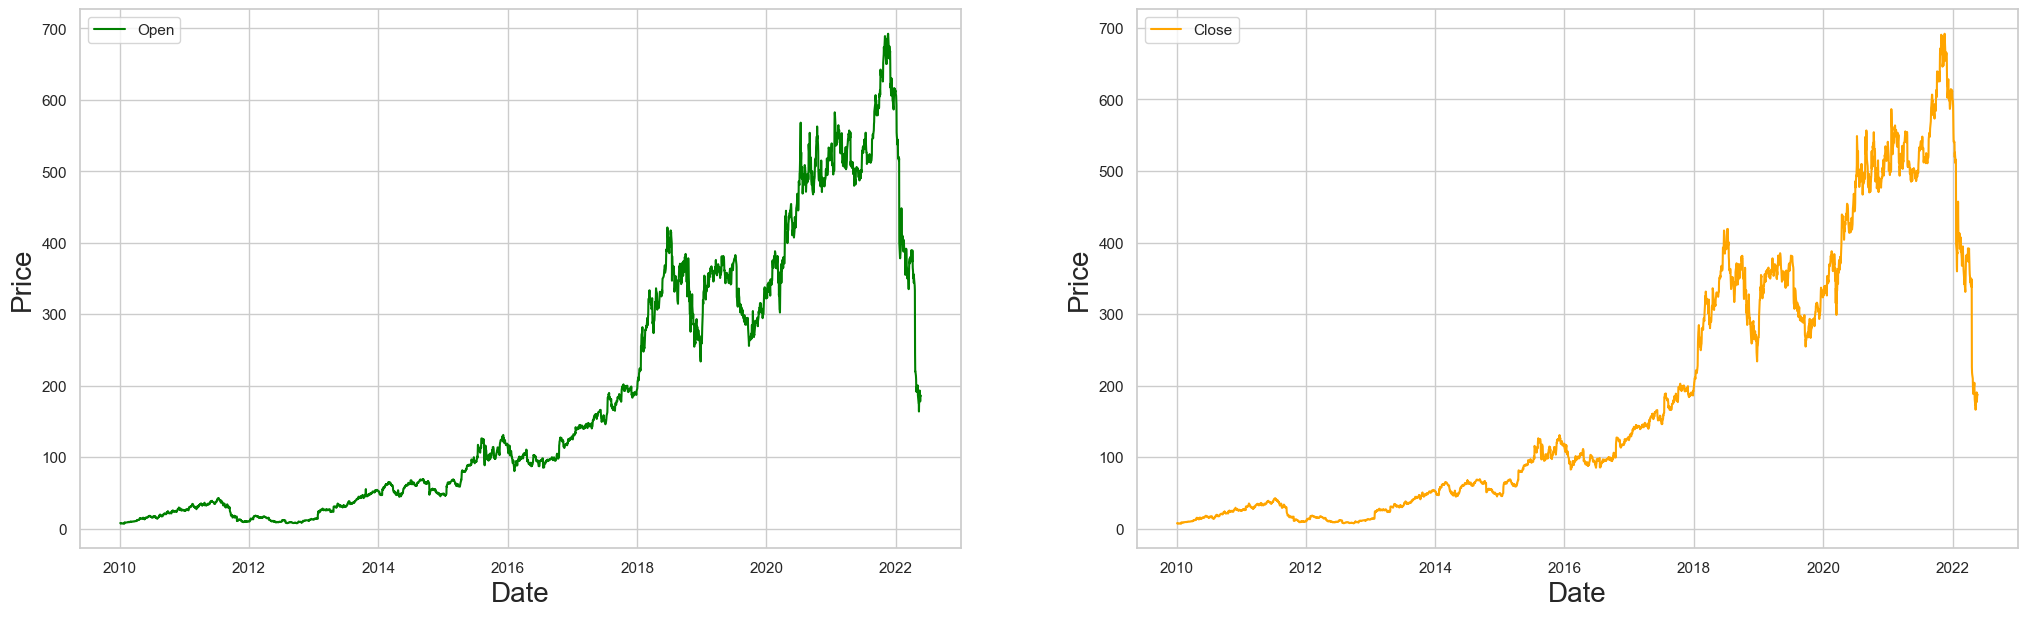

In [21]:

sns.set(style='whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(25, 7))

# Plot 'open' column
sns.lineplot(data=df, x=df.index, y='Open', ax=ax[0], label='Open', color='green')
ax[0].set_xlabel('Date', size=20)
ax[0].set_ylabel('Price', size=20)
ax[0].legend()

# Plot 'close' column
sns.lineplot(data=df, x=df.index, y='Close', ax=ax[1], label='Close', color='orange')
ax[1].set_xlabel('Date', size=20)
ax[1].set_ylabel('Price', size=20)
ax[1].legend()

plt.show()

DATA PRE PROCESSING

In [22]:
  print(df.dtypes)

Close    float64
Open     float64
dtype: object


In [23]:
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df)
df

,Close,Open
Date,,
2010-01-04,0.000908,0.001417
2010-01-05,0.000497,0.001011
2010-01-06,0.000874,0.000586
2010-01-07,0.000682,0.001126
2010-01-08,0.000870,0.000786
...,...,...
2022-05-17,0.268072,0.265849
2022-05-18,0.248545,0.262274
2022-05-19,0.257732,0.249624


In [24]:
training_size= int(len(df) * 0.70)
#use 70 % data for training and the rest 30% for testing
training_size

2183

In [25]:
train_data = df[:training_size]
test_data  = df[training_size:]
train_data.shape, test_data.shape

((2183, 2), (936, 2))

In [26]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
    sequences = []
    labels = []
    start_idx = 0

    for stop_idx in range(50,len(dataset)):
        # Selecting 50 rows at a time
        sequences.append(dataset.iloc[start_idx:stop_idx])
        labels.append(dataset.iloc[stop_idx])
        start_idx += 1
    return (np.array(sequences),np.array(labels))

In [27]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((2133, 50, 2), (2133, 2), (886, 50, 2), (886, 2))

# IMPLEMENTING LSTM 

In [28]:
# imported Sequential from keras.models  
model = Sequential()
# importing Dense, Dropout, LSTM, Bidirectional from keras.layers 
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.1)) 
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
67/67 [==============================] - 4s 29ms/step - loss: 0.0015 - mean_absolute_error: 0.0195 - val_loss: 0.0019 - val_mean_absolute_error: 0.0306
Epoch 2/100
67/67 [==============================] - 1s 22ms/step - loss: 1.6073e-04 - mean_absolute_error: 0.0079 - val_loss: 0.0019 - val_mean_absolute_error: 0.0305
Epoch 3/100
67/67 [==============================] - 1s 22ms/step - loss: 1.4218e-04 - mean_absolute_error: 0.0072 - val_loss: 0.0018 - val_mean_absolute_error: 0.0299
Epoch 4/100
67/67 [==============================] - 1s 22ms/step - loss: 1.2546e-04 - mean_absolute_error: 0.0067 - val_loss: 0.0025 - val_mean_absolute_error: 0.0377
Epoch 5/100
67/67 [==============================] - 1s 22ms/step - loss: 1.2862e-04 - mean_absolute_error: 0.0070 - val_loss: 0.0019 - val_mean_absolute_error: 0.0321
Epoch 6/100
67/67 [==============================] - 1s 22ms/step - loss: 1.3630e-04 - mean_absolute_error: 0.0071 - val_loss: 0.0024 - val_mean_absolute_error: 0.0

67/67 [==============================] - 1s 22ms/step - loss: 4.5650e-05 - mean_absolute_error: 0.0040 - val_loss: 7.3285e-04 - val_mean_absolute_error: 0.0195
Epoch 50/100
67/67 [==============================] - 1s 22ms/step - loss: 4.8860e-05 - mean_absolute_error: 0.0045 - val_loss: 9.0531e-04 - val_mean_absolute_error: 0.0227
Epoch 51/100
67/67 [==============================] - 2s 24ms/step - loss: 6.1271e-05 - mean_absolute_error: 0.0048 - val_loss: 4.5169e-04 - val_mean_absolute_error: 0.0146
Epoch 52/100
67/67 [==============================] - 2s 23ms/step - loss: 4.9424e-05 - mean_absolute_error: 0.0043 - val_loss: 5.4424e-04 - val_mean_absolute_error: 0.0165
Epoch 53/100
67/67 [==============================] - 1s 22ms/step - loss: 4.7919e-05 - mean_absolute_error: 0.0045 - val_loss: 6.1245e-04 - val_mean_absolute_error: 0.0179
Epoch 54/100
67/67 [==============================] - 1s 22ms/step - loss: 5.0354e-05 - mean_absolute_error: 0.0043 - val_loss: 0.0017 - val_mean_ab

67/67 [==============================] - 1s 22ms/step - loss: 3.4636e-05 - mean_absolute_error: 0.0038 - val_loss: 6.2369e-04 - val_mean_absolute_error: 0.0184
Epoch 97/100
67/67 [==============================] - 1s 22ms/step - loss: 4.3793e-05 - mean_absolute_error: 0.0043 - val_loss: 3.2416e-04 - val_mean_absolute_error: 0.0121
Epoch 98/100
67/67 [==============================] - 2s 22ms/step - loss: 3.2499e-05 - mean_absolute_error: 0.0033 - val_loss: 4.1630e-04 - val_mean_absolute_error: 0.0149
Epoch 99/100
67/67 [==============================] - 1s 22ms/step - loss: 3.9750e-05 - mean_absolute_error: 0.0040 - val_loss: 5.4046e-04 - val_mean_absolute_error: 0.0170
Epoch 100/100
67/67 [==============================] - 1s 22ms/step - loss: 4.1598e-05 - mean_absolute_error: 0.0042 - val_loss: 3.4382e-04 - val_mean_absolute_error: 0.0126


In [30]:
# predicting the values after running the model
test_predicted = model.predict(test_seq)
test_predicted[:10]

28/28 [==============================] - 1s 9ms/step


array([[0.42810073, 0.42498475],
       [0.42833883, 0.4251081 ],
       [0.4236938 , 0.4204426 ],
       [0.42199376, 0.41871077],
       [0.40899518, 0.40567034],
       [0.3871394 , 0.38402286],
       [0.39201665, 0.3888993 ],
       [0.38466838, 0.3815263 ],
       [0.38518983, 0.3820485 ],
       [0.38867193, 0.38555887]], dtype=float32)

In [31]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = scaler.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[300.12692, 298.2403 ],
       [300.28995, 298.32483],
       [297.10962, 295.12717],
       [295.94565, 293.9402 ],
       [287.0459 , 285.00238]], dtype=float32)

In [32]:
# Inversing normalization/scaling on predicted data 
test_inverse_predicted = scaler.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[300.12692, 298.2403 ],
       [300.28995, 298.32483],
       [297.10962, 295.12717],
       [295.94565, 293.9402 ],
       [287.0459 , 285.00238]], dtype=float32)


# VISUALIZING ACTUAL VS PREDICTED DATA

In [36]:
# Merging actual and predicted data for better visualization
df_merge = pd.concat([df.iloc[-253:].copy(), pd.DataFrame(test_inverse_predicted[-253:], columns=['open_predicted', 'close_predicted'], index=df.iloc[-253:].index)], axis=1)

In [37]:
df_merge[['Open','Close']] = scaler.inverse_transform(df_merge[['Open','Close']])
df_merge.head()

,Close,Open,open_predicted,close_predicted
Date,,,,
2021-05-24,503.361838,500.590568,502.660858,500.283600
2021-05-25,501.800203,505.535390,502.598846,500.268463
2021-05-26,502.821262,501.879224,502.699677,500.388489
2021-05-27,504.322836,501.339782,500.731506,498.477264
2021-05-28,503.271747,503.937062,501.379578,499.163177


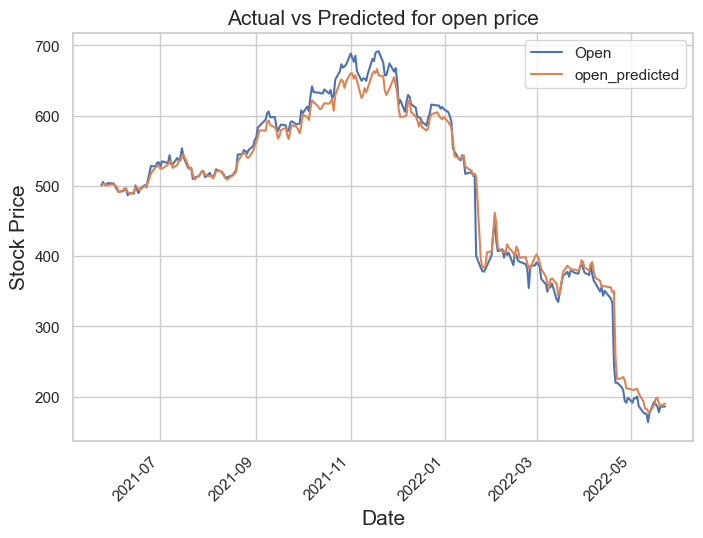

In [38]:
# plotting the actual open and predicted open prices on date index
df_merge[['Open','open_predicted']].plot(figsize=(8,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

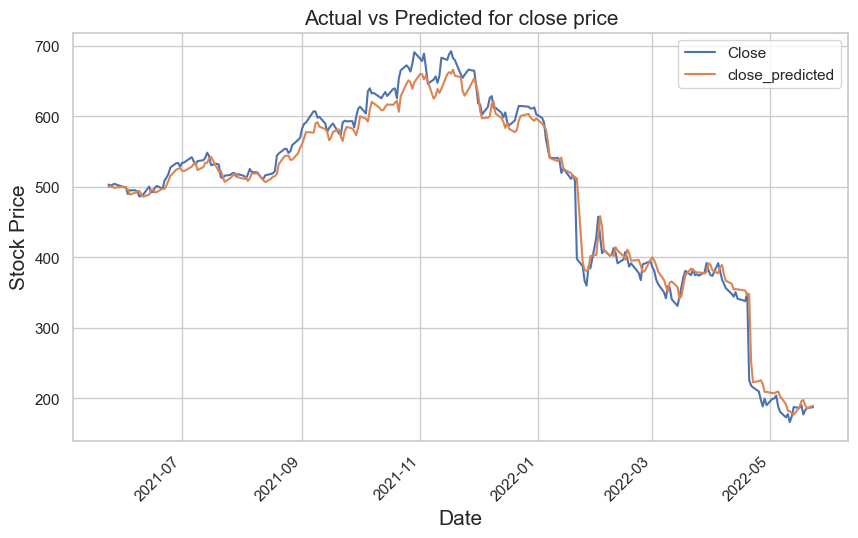

In [39]:
# plotting the actual close and predicted close prices on date index 
df_merge[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [40]:
# Creating a dataframe and adding 15 days to existing index 

df_merge = df_merge.append(pd.DataFrame(columns=df_merge.columns,
                                        index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D', closed='right')))
df_merge['2021-06-09':'2021-06-21']

,Close,Open,open_predicted,close_predicted
2021-06-09,486.253906,494.047447,496.590637,494.302307
2021-06-10,487.715429,486.725144,491.167938,488.850708
2021-06-11,489.217004,489.552164,488.430206,486.116364
2021-06-14,500.348700,489.232493,491.329163,488.988617
2021-06-15,492.350294,500.770402,498.139771,495.823639
2021-06-16,492.860839,494.546923,498.424133,496.063690
2021-06-17,498.797054,489.801902,494.258057,491.920166
2021-06-18,501.229597,495.945449,495.086578,492.797638
2021-06-21,497.455652,501.179976,499.711121,497.428986


In [41]:
# creating a DataFrame and filling values of open and close column
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [42]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 10ms/step


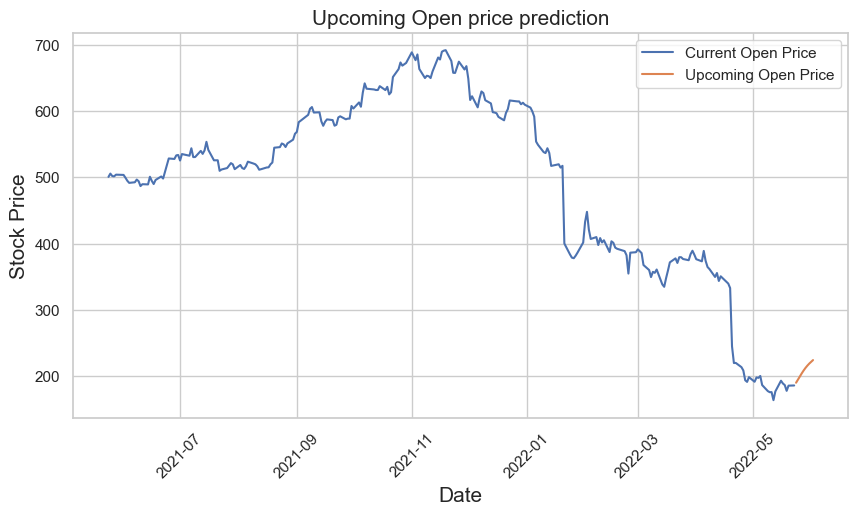

In [43]:
upcoming_prediction[['open','close']] = scaler.inverse_transform(upcoming_prediction[['open','close']])
# plotting Upcoming Open price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fig.show()

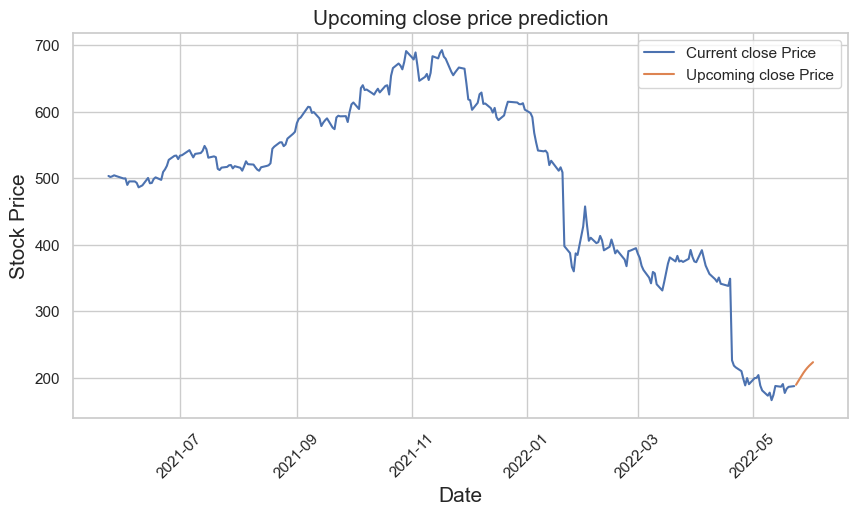

In [44]:
# plotting Upcoming Close price on date index
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.loc['2021-04-01':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price',)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fig.show()